In [1]:
using JLD
using PyPlot
using Statistics, StatsBase
using Clustering

In [2]:
nombrecm="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-CM.jld"
archivo=load(nombrecm)
DatosCMP=archivo["CMP"]
DatosCMN=archivo["CMN"];
evocada=false
nmax=length(DatosCMP)

2000

In [5]:
# Datos ordenados 4dimensionalmente.
# vamos a usar masa maxima y tiempo maximo normalizados a 64 (dist max.)
# para hacer un hipercubo platonico y hacer el apiñonamiento jerárquico ahi.

fruncio=Array{Float64}(undef, 0,4)

for k in keys(DatosCMP)
    dat=DatosCMP[k]
    (alto, ancho)=size(dat)
    auxt=ones(alto).*k
    afafa=hcat(dat, auxt)
    fruncio=vcat(fruncio,afafa)
end

In [7]:
masamax=maximum(fruncio[:,3])

12329.550282478333

In [9]:
nmax=maximum(fruncio[:,4])

2000.0

In [15]:
xx=fruncio[:,1]
yy=fruncio[:,2]
gordis=fruncio[:,3]
nn=fruncio[:,4];

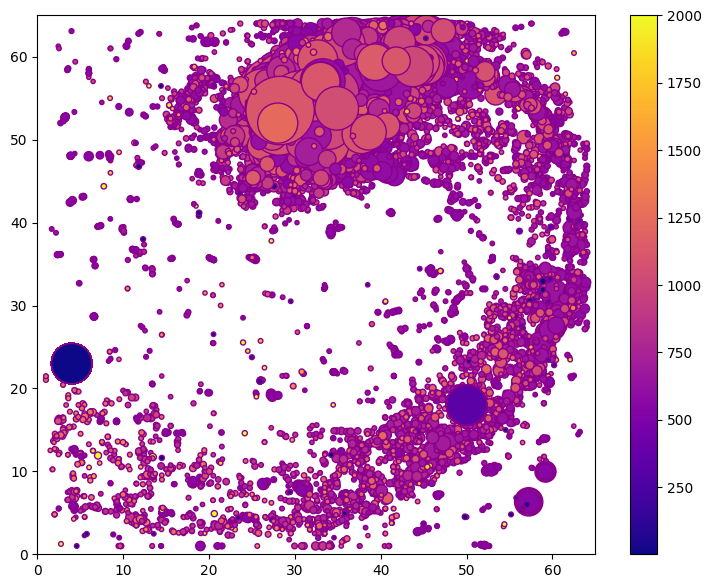

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc00a1e3b00>

In [20]:
figure(figsize=(9,7))
#axis("equal")
xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.25*gordis, edgecolors="darkmagenta", c=nn, cmap="plasma")
colorbar()

In [31]:
# clust1=fruncio[:,1:2];
clust1=permutedims(fruncio)

4×9840 Array{Float64,2}:
   49.9978    31.7893    11.5064  …    20.5514    44.7566    49.9984
   18.0004    60.9192     3.4862       50.0248    54.6292    17.9983
 3355.89      82.6364    43.3552       42.9205    85.3075  3345.59  
  306.0     1316.0     1316.0        1241.0     1241.0      322.0   

In [27]:
function normalizar1(xx::Array)
    norma=maximum(abs.(xx))
    result=xx./norma
    return result
end

normalizar1 (generic function with 2 methods)

In [34]:
clust1[3,:]=normalizar1(clust1[3,:]).*64
clust1[4,:]=normalizar1(clust1[4,:]).*64

9840-element Array{Float64,1}:
  9.792
 42.112
 42.112
 42.112
 42.656
 42.656
 42.656
 36.192
 36.192
 36.192
 36.192
 36.192
 36.192
  ⋮    
 33.344
 49.12 
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 10.304

In [35]:
using Distances

In [90]:
clustspaciotiempo=vcat(clust1[1:2,:], transpose(clust1[4,:]))

3×9840 Array{Float64,2}:
 49.9978  31.7893  11.5064  10.2865   …  28.0012  20.5514  44.7566  49.9984
 18.0004  60.9192   3.4862   7.00301     51.9968  50.0248  54.6292  17.9983
  9.792   42.112   42.112   42.112       39.712   39.712   39.712   10.304 

In [44]:
dd4d=pairwise(Euclidean(), clust1);

In [91]:
dd3d=pairwise(Euclidean(), clustspaciotiempo);
dd2d=pairwise(Euclidean(), clust1[1:2,:]);

In [88]:
clust1[4,:]

9840-element Array{Float64,1}:
  9.792
 42.112
 42.112
 42.112
 42.656
 42.656
 42.656
 36.192
 36.192
 36.192
 36.192
 36.192
 36.192
  ⋮    
 33.344
 49.12 
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 10.304

In [92]:
h4d=hclust(dd4d)
h3d=hclust(dd3d)
h2d=hclust(dd2d)

Hclust{Float64}([-2003 -3558; -3451 -7162; … ; 6946 9837; 3995 9838], [9.36836e-6, 1.08421e-5, 2.18722e-5, 2.27687e-5, 2.388e-5, 2.38943e-5, 2.3937e-5, 2.90832e-5, 3.26346e-5, 3.26485e-5  …  3.40739, 3.41606, 3.45495, 3.46857, 3.54287, 3.78235, 3.85123, 3.90964, 4.18934, 4.28125], [2105, 7583, 2328, 1641, 5591, 409, 7571, 5578, 1622, 2316  …  3964, 1363, 8160, 3987, 1636, 2976, 2117, 425, 2356, 7606], :single)

In [211]:
clust4d=cutree(h4d,k=2000)
clust3d=cutree(h3d,k=2000)
clust2d=cutree(h2d,k=2000);

### 

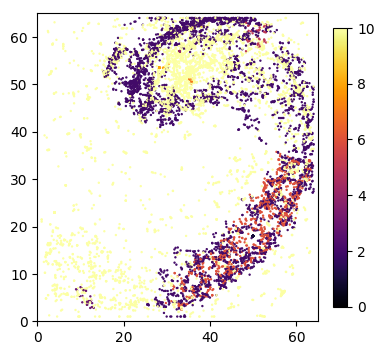

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbf6ec7cac8>

In [166]:
fafa=figure(figsize=(4,4))
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.5, c=clust4d, cmap="inferno", vmin=0, vmax=10)
colorbar(fraction=0.045)

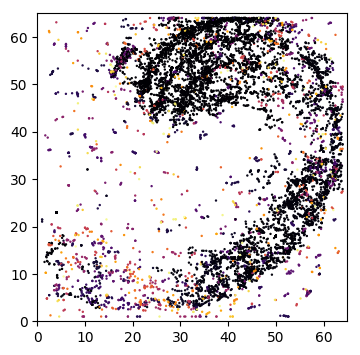

PyObject <matplotlib.collections.PathCollection object at 0x7fbf6ebe8710>

In [167]:
fafa=figure(figsize=(4,4))
#axis("equal")
#ax = fafa.add_subplot(111, projection="3d")
xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.5, c=clust3d, cmap="inferno")
#colorbar(fraction=0.045)

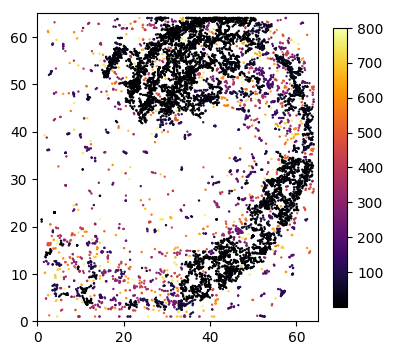

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbf6eb781d0>

In [168]:
fafa=figure(figsize=(4,4))
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.5, c=clust2d, cmap="inferno")
colorbar(fraction=0.045)

In [197]:
function filtraclusterchicos(puntos, clustree, umbral)
    tabla=hcat(puntos,clustree)
    valores=unique(clustree)
    dd=Dict([(i,count(x->x==i,clust2d)) for i in valores])
    predicado(j)=dd[j]>umbral
    result=tabla[map(x->predicado(x), clustree),:]
    clusterfuck=maximum(values(dd))
    println("el cluster mayor tiene ",clusterfuck, " elementos")
    return result
end

filtraclusterchicos (generic function with 1 method)

In [212]:
u=20
blabla=filtraclusterchicos(fruncio, clust2d, 30)
blublu=blabla[:,5]
size(blabla)

el cluster mayor tiene 370 elementos


(4435, 5)

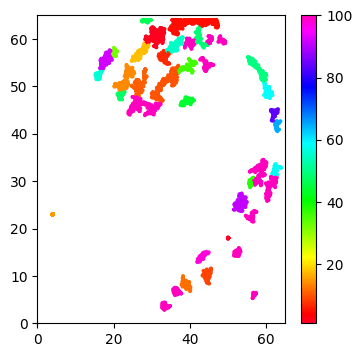

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbf6e33bf60>

In [214]:
fafa=figure(figsize=(4,4))
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(blabla[:,1], blabla[:,2], c=blublu, s=3.5, cmap="gist_rainbow", vmax=100)
colorbar()

In [204]:
blabla

578×5 Array{Float64,2}:
 49.9978   18.0004  3355.89  306.0   1.0
  4.00008  23.0012  3360.28   74.0  17.0
 50.0004   17.9993  3361.53  285.0   1.0
  4.00163  22.9998  3360.78  285.0  17.0
 49.9989   18.001   3347.37  318.0   1.0
 49.9981   18.0009  3357.88  354.0   1.0
  4.00311  22.9998  3359.37  117.0  17.0
 49.9992   17.9989  3363.02  474.0   1.0
 49.9991   18.0003  3357.62  353.0   1.0
 49.9985   18.0012  3341.54  430.0   1.0
  4.00213  22.9978  3355.8    79.0  17.0
  4.00046  22.9995  3344.74  154.0  17.0
  4.00004  23.0024  3351.28  107.0  17.0
  ⋮                                     
  3.99968  22.9989  3357.07  219.0  17.0
  4.00089  22.9983  3344.75  223.0  17.0
  3.99795  22.9984  3358.62  259.0  17.0
 50.0023   18.0003  3365.76  531.0   1.0
  3.99997  23.0019  3362.94   32.0  17.0
 49.9982   18.0006  3359.83  316.0   1.0
 49.9981   17.9984  3342.68  432.0   1.0
 50.0012   18.0008  3359.09  381.0   1.0
  3.99833  22.9997  3356.67    3.0  17.0
 50.0019   17.9975  3366.41  341.

In [186]:
blabla

7017×5 Array{Float64,2}:
 49.9978  18.0004   3355.89     306.0    1.0
 31.7893  60.9192     82.6364  1316.0    2.0
 11.5064   3.4862     43.3552  1316.0    3.0
 38.625   63.6998    103.111   1333.0    2.0
 44.6363  63.852      62.449   1333.0    2.0
 33.9613  62.5257     38.6351  1333.0    2.0
 32.9889  57.0028   3381.34    1131.0    2.0
 44.7603  10.4966    187.145   1131.0    6.0
 35.8235  50.9891   2153.26    1131.0    2.0
 28.2295  53.5208   9503.86    1131.0    2.0
 35.8608  61.6307   1819.48    1131.0    2.0
 38.8919   8.68611    60.7158  1131.0    7.0
 49.1138  50.6315     75.2048  1131.0    8.0
  ⋮                                         
 63.4854  38.5282     65.5696  1042.0   40.0
 62.2498  30.6193    117.3     1042.0   15.0
 60.771   48.4251    145.697   1042.0   31.0
 34.8773  53.779    3939.05    1042.0    2.0
 51.379   62.5233     52.3036  1241.0  198.0
 36.0204   6.52732    68.1228  1241.0   55.0
 25.233   55.7956     60.1579  1241.0    2.0
 40.0727   7.14418    42.0553 